In [3]:
maindir     = '/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual/subsample_test/'
setwd(maindir)

In [1]:
library(tidyr)

In [2]:
cellnumber = c(10,25,50,100,250,500,1000,2000)

In [4]:
celltypes = paste0("sub", c(10,25,50,100,250,500,1000,2000))

In [5]:
res_tot = data.frame()
for (c in celltypes) {
results_lead       = read.table(paste0(c, "/Results_run1_lead.tsv"), header=T, stringsAsFactors = F)
    results_lead$cell = c
res_tot = rbind(res_tot, results_lead)
    }

In [6]:
mono = read.table(paste0('/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/fine/cMono', "/Results_run3_lead.tsv"), header=T, stringsAsFactors = F)
mono$exclude = mono$Sequencing_mapping_error_rate>0.1 | mono$Ref_allele_bias<0.2 | mono$Ref_allele_bias>0.8
mono $cell ="cMono"
res_tot = rbind(res_tot, mono)

In [7]:
res_tot$signif = res_tot$flag_fdr10 & res_tot$exclude==FALSE


In [8]:
wide = spread(data = res_tot[,c('Feature', 'cell', 'signif')], key=cell, value =signif )

In [9]:
pct = setNames(rep(NA,8),celltypes)
numb = setNames(rep(NA,8),celltypes)
for (c in celltypes){
    
    c1 =subset(wide, wide[,c]==TRUE)
    pct[c]   <- sum(c1[,"cMono"], na.rm=T)/sum( c1[,c])
    numb[c]     <- sum( c1[,c]) 
}

In [10]:
pct

sub10     sub25     sub50    sub100    sub250    sub500   sub1000   sub2000 
0.0000000 1.0000000 0.6250000 0.8152174 0.8550000 0.8245098 0.8159117 0.8366843

In [11]:
df = data.frame(no_cells=cellnumber, caQTLs_fdr10 = numb, recall_original = pct )

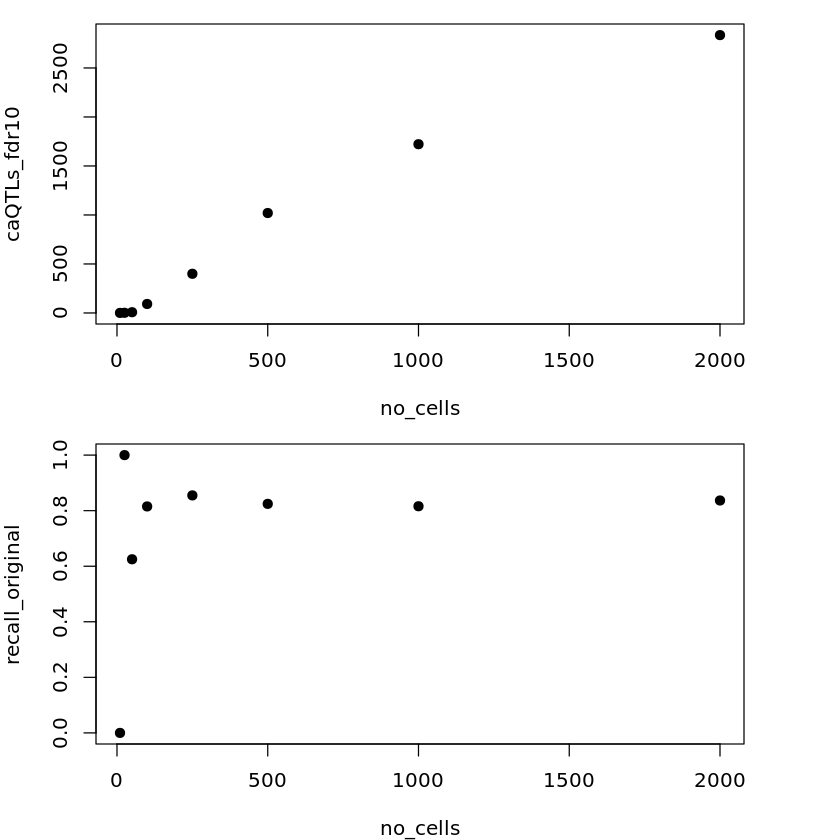

In [12]:
par(mfrow=c(2,1), mar = c(4,4,1,4))
plot(df[,1:2], pch= 20, cex=1.5)
plot(df[,c(1,3)], pch=20, cex=1.5 )

In [14]:
library(qvalue)
library(data.table)

In [16]:
pi = setNames(rep(NA,8),celltypes)

for(ce in celltypes){
res = subset(res_tot, cell==ce & flag_fdr10==TRUE & exclude==FALSE)
qt  = res[,c('Feature', "rsID")]
    if (nrow(qt)>1){
    
        res2 =  merge(qt, mono, by=c('Feature','rsID')) 
         if(nrow(res2)>1){
            pv2 = c(na.omit(res2$P_VAl), 1) #### escamotage
           if(length(pv2)>1){
            qobj <- qvalue(pv2)
        pi[ce] =  1 - qobj$pi0
            }
    }
}
    }
    
    

In [18]:
pi

sub10     sub25     sub50    sub100    sub250    sub500   sub1000   sub2000 
       NA        NA 0.0000000 0.6766223 0.9421075 0.9789130 0.9875554 0.9952912

In [19]:
pi = setNames(rep(NA,8),celltypes)

for(ce in celltypes){
res = subset(res_tot, cell==ce & flag_fdr10==TRUE & exclude==FALSE)
qt  = res[,c('Feature', "rsID")]
    if (nrow(qt)>1){
    
        res2 =  merge(qt, mono, by=c('Feature')) 
         if(nrow(res2)>1){
            pv2 = c(na.omit(res2$P_VAl), 1) #### escamotage
           if(length(pv2)>1){
            qobj <- qvalue(pv2)
        pi[ce] =  1 - qobj$pi0
            }
    }
}
    }
  

In [20]:
pi

sub10     sub25     sub50    sub100    sub250    sub500   sub1000   sub2000 
       NA 0.0000000 0.0000000 0.8774865 0.9699832 0.9893211 0.9930614 0.9965849

In [22]:
df$pi_orig<-pi

In [23]:
df

,no_cells,caQTLs_fdr10,recall_original,pi_orig
,<dbl>,<int>,<dbl>,<dbl>
sub10,10,1,0.0000000,NA
sub25,25,2,1.0000000,0.0000000
sub50,50,8,0.6250000,0.0000000
sub100,100,92,0.8152174,0.8774865
sub250,250,400,0.8550000,0.9699832
sub500,500,1020,0.8245098,0.9893211
sub1000,1000,1722,0.8159117,0.9930614
sub2000,2000,2835,0.8366843,0.9965849


## Compare with the poplonly analysis

In [99]:
res_totp = data.frame()
for (c in celltypes) {
results_lead       = read.table(paste0(c, "/Results_run3_lead.tsv"), header=T, stringsAsFactors = F)
    results_lead$cell = c
res_totp = rbind(res_totp, results_lead)
    }

In [100]:
# mono = read.table('/nfs/lab/projects/pbmc_snATAC/analysis_v2/rasqual_eur/fine/cMono/Results_pop1_lead.tsv', header=T, stringsAsFactors = F)
# mono$exclude = mono$Sequencing_mapping_error_rate>0.1 | mono$Ref_allele_bias<0.2 | mono$Ref_allele_bias>0.8
# mono $cell ="cMono"
 res_totp = rbind(res_totp, mono)

In [101]:
res_totp$signif = res_totp$flag_fdr10 & res_totp$exclude==FALSE


In [102]:
widep = spread(data = res_totp[,c('Feature', 'cell', 'signif')], key=cell, value =signif )

In [103]:
pct = setNames(rep(NA,8),celltypes)
numb = setNames(rep(NA,8),celltypes)
for (c in celltypes){
    
    c1 =subset(widep, widep[,c]==TRUE)
    pct[c]   <- sum(c1[,"cMono"], na.rm=T)/sum( c1[,c])
    numb[c]     <- sum( c1[,c]) 
}

In [104]:
dfp = data.frame(no_cells=cellnumber, caQTLs_fdr10 = numb, recall_original = pct )

In [105]:
dfp

,no_cells,caQTLs_fdr10,recall_original
,<dbl>,<int>,<dbl>
sub10,10,0,NaN
sub25,25,0,NaN
sub50,50,0,NaN
sub100,100,13,0.9230769
sub250,250,67,0.8656716
sub500,500,63,0.8730159
sub1000,1000,179,0.8659218
sub2000,2000,323,0.9318885
